# In this notebook we will take the information gained in the EDA and create regression models to predict arrival delay times at JFK

In [93]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
df = pd.read_csv("ON_TIME_2.CSV")

In [95]:
#filtering dataframe by jfk airpot
filter1 = df['ORIGIN'] == "JFK"
filter2 = df['DEP_DELAY'] > 0.0
df = df.where(filter1 & filter2, inplace=False)
df = df.fillna(value=0)

In [96]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [97]:
#checking for independence between variables
x = df[['DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 
        'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
calc_vif(x)

,variables,VIF
0,DEP_DELAY,14.984338
1,CARRIER_DELAY,10.100823
2,WEATHER_DELAY,1.069057
3,NAS_DELAY,1.383887
4,SECURITY_DELAY,1.051029
5,LATE_AIRCRAFT_DELAY,3.951653


In [98]:
#from the EDA in the previous script we determine that the model of best fit will be DEP_DELAY and CARRIER_DELAY to predict ARR_DELAY
X = df[['DEP_DELAY']]
Y = df[['ARR_DELAY']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 4.688e+05
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:56:16   Log-Likelihood:            -1.6624e+05
No. Observations:               57256   AIC:                         3.325e+05
Df Residuals:                   57254   BIC:                         3.325e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3543      0.019    -19.064      0.0

In [99]:
#multiple regression model
df = df.fillna(value=0)
X = df[['DEP_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY']]
Y = df[['ARR_DELAY']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.418e+05
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:56:17   Log-Likelihood:            -1.6133e+05
No. Observations:               57256   AIC:                         3.227e+05
Df Residuals:                   57251   BIC:                         3.227e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3947      0.017    -23.

## Finally We graph our regression models

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

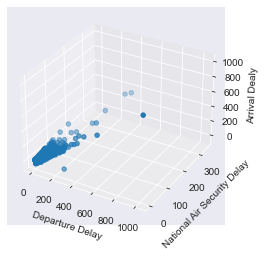

In [101]:
sns.set_style("darkgrid")
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['DEP_DELAY']
y = df['NAS_DELAY']
z = df['ARR_DELAY']

ax.set_xlabel("Departure Delay")
ax.set_ylabel("National Air Security Delay")
ax.set_zlabel("Arrival Dealy")

ax.scatter(x, y, z)

plt.show()

<AxesSubplot:xlabel='DEP_DELAY', ylabel='ARR_DELAY'>

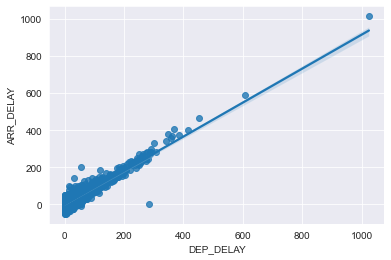

In [102]:
#Simple Regression Plot
sns.set_style("darkgrid")
sns.regplot(x = 'DEP_DELAY', y = 'ARR_DELAY', data = df)

<AxesSubplot:xlabel='NAS_DELAY', ylabel='ARR_DELAY'>

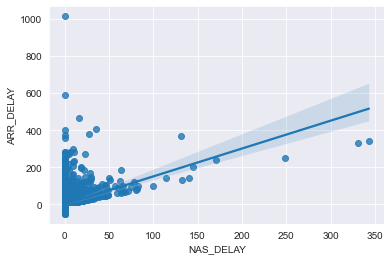

In [103]:
sns.regplot(x = 'NAS_DELAY', y = 'ARR_DELAY', data = df)